In [2]:
import surface_code_opt as sc
import matplotlib.pyplot as plt

In [3]:
physical_error_rate = 1e-4
clock_cycle_time = 1e-6
max_physical_qubits = 8000000000

# setting of HHl
# kappa = 
epsilon = 0.1
precision = 5

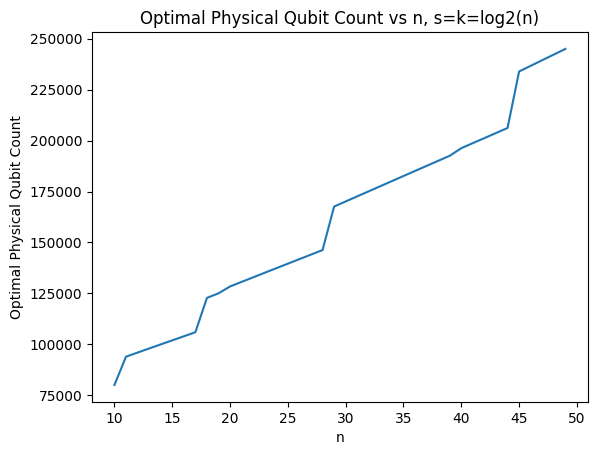

In [8]:
opt_dist_block_counts = []
opt_data_protos = []
opt_time = []
opt_physical_qubit_count = []

for n in range(10, 50):
    sparsity = n 
    kappa = n 
    hhl_task = sc.HHL(n, sparsity, kappa, epsilon, precision)

    (
        optimal_distillation_block_count,
        optimal_data_protocol,
        optimal_cycle_count,
        optimal_physical_qubit_count,
    ) = sc.find_optimal_setting(
        hhl_task.t_gate_count,
        hhl_task.logical_qubit_count,
        physical_error_rate,
        max_physical_qubits,
    )

    opt_dist_block_counts.append(optimal_distillation_block_count)
    opt_data_protos.append(optimal_data_protocol)
    opt_time.append(optimal_cycle_count * clock_cycle_time)
    opt_physical_qubit_count.append(optimal_physical_qubit_count)


plt.plot(range(10, 50), opt_physical_qubit_count)
plt.xlabel('n')
plt.ylabel('Optimal Physical Qubit Count')
plt.title('Optimal Physical Qubit Count vs n (s=k=log2(n))')
plt.savefig("space_line.pdf")
plt.show()
# fig, ax1 = plt.subplots(figsize=(12, 6))
# color = "tab:red"
# ax1.set_xlabel("n")
# ax1.set_ylabel("Optimal Time (s)", color=color)
# ax1.plot(range(10, 50), opt_time, color=color)
# ax1.tick_params(axis="y", labelcolor=color)

# ax2 = ax1.twinx()
# color = "tab:blue"
# ax2.set_ylabel("Optimal Physical Qubit Count", color=color)
# ax2.plot(range(10, 50), opt_physical_qubit_count, color=color)
# ax2.tick_params(axis="y", labelcolor=color)

# fig.tight_layout()

# for i in range(1, len(opt_dist_block_counts)):
#     if opt_dist_block_counts[i] != opt_dist_block_counts[i - 1]:
#         ax1.axvline(x=i + 10, color="green", linestyle="--")
#         ax1.text(
#             i + 10,
#             max(opt_time),
#             f"nd = {opt_dist_block_counts[i]}",
#             rotation=90,
#             verticalalignment="bottom",
#         )

# data_protocol_colors = ["lightblue", "lightgreen", "lightcoral"]
# current_protocol = opt_data_protos[0]
# start_index = 0

# for i in range(1, len(opt_data_protos)):
#     if opt_data_protos[i] != current_protocol:
#         ax1.axvspan(
#             start_index + 10,
#             i + 10,
#             color=data_protocol_colors[sc.data_protocals.index(current_protocol)],
#             alpha=0.3,
#         )
#         ax1.text(
#             (start_index + i) / 2 + 10,
#             max(opt_time) * 0.8,
#             current_protocol.name,
#             rotation=90,
#             verticalalignment="bottom",
#         )
#         current_protocol = opt_data_protos[i]
#         start_index = i

# ax1.axvspan(
#     start_index + 10,
#     50,
#     color=data_protocol_colors[sc.data_protocals.index(current_protocol)],
#     alpha=0.3,
# )
# ax1.text(
#     (start_index + 50) / 2,
#     max(opt_time) * 0.8,
#     current_protocol.name,
#     rotation=90,
#     verticalalignment="bottom",
# )

# plt.show()

# print(
#     f"Optimal distillation block count: {optimal_distillation_block_count}\n"
#     f"Optimal data protocol: {optimal_data_protocol}\n"
#     f"Optimal time: {optimal_cycle_count * clock_cycle_time}\n"
#     f"Optimal physical qubit count: {optimal_physical_qubit_count}\n\n"
# )